In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import approx_fprime

## Define Logistic Function

Text(0.5, 1.0, 'Logistic Function')

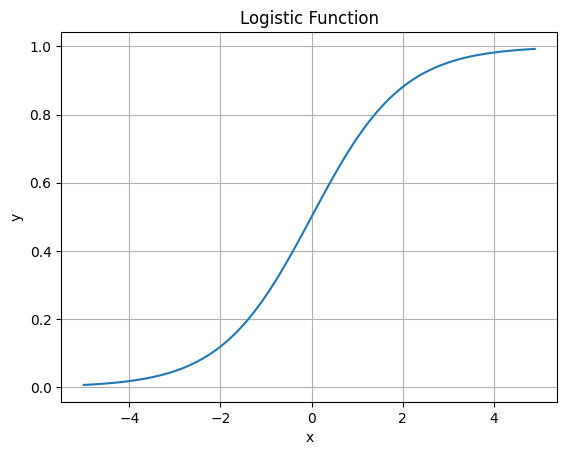

In [2]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Apply the function
x_vals = np.arange(-5,5,0.1)
y_vals = logistic(x_vals)

plt.figure()
plt.plot(x_vals, y_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logistic Function")

## Compute Numerical Approximation to Derivative Function

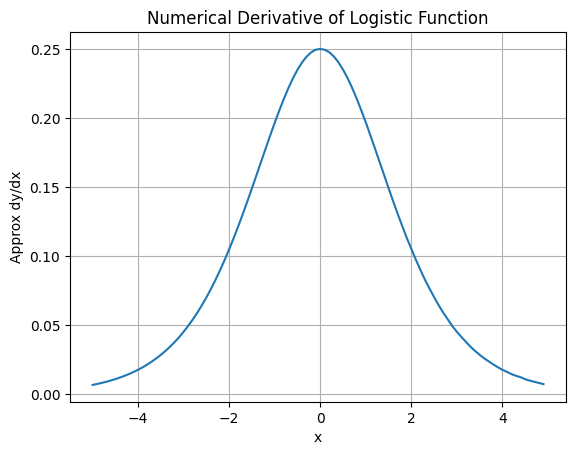

In [3]:
def logistic_deriv_approx(x):
    return approx_fprime(np.array([x]), logistic, epsilon=1e-12)

x_vals           = np.arange(-5,5,0.1)
approx_dydx_vals = []

for x in x_vals:
    grad_approx = logistic_deriv_approx(x)
    approx_dydx_vals.append(grad_approx)
approx_dydx_vals=np.array(approx_dydx_vals).reshape(-1,)

plt.figure()
plt.plot(x_vals, approx_dydx_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Approx dy/dx")
plt.title("Numerical Derivative of Logistic Function");

## Check Approximation Error

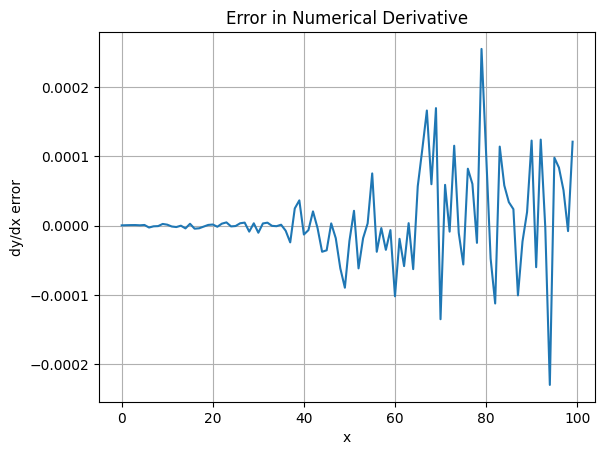

In [4]:
def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

dydx_vals = logistic_derivative(x_vals)
error     = dydx_vals - approx_dydx_vals

plt.figure()
plt.plot(error)
plt.xlabel("x")
plt.ylabel("dy/dx error")
plt.title("Error in Numerical Derivative")
plt.grid("True")


# Logistic Regression Example

## Define the probabilistic classification function

In [5]:
def logistic_regression(theta,x):
    w = theta[:-1].reshape(-1,1)
    b = theta[-1]
    return logistic( w.T@x +b )


## Define the nll

In [6]:
def nll(theta,y,x):
    pygx = logistic_regression(theta,x)
    nll = y*np.log(pygx) + (1-y)*np.log(1-pygx)
    return nll

## Get the gradient

In [7]:
x     = np.array([1,2]).T
y     = 1
theta = np.array([0.5,0.5,1])

grad_approx = approx_fprime(theta, nll, 1e-10, y, x)
grad_approx

array([0.07585848, 0.15171446, 0.07585848])